In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

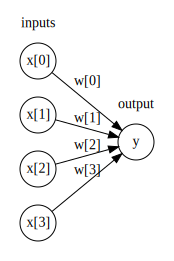

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

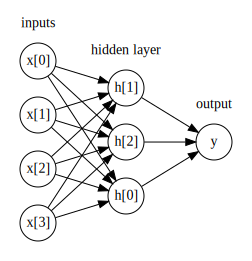

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

In [4]:
line = np.linspace(-3, 3, 100)

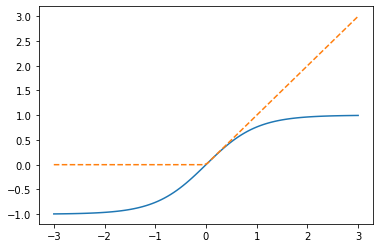

In [5]:
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), linestyle='--', label='relu')

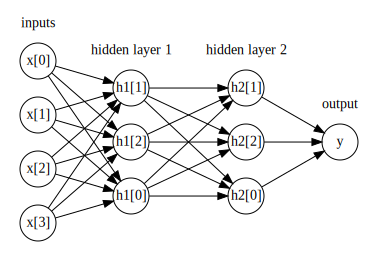

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

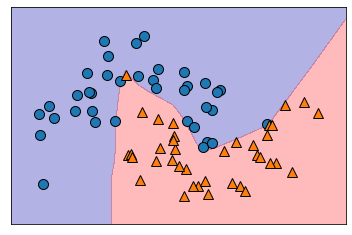

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


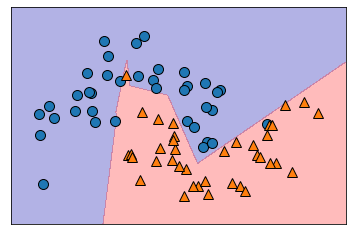

In [8]:

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

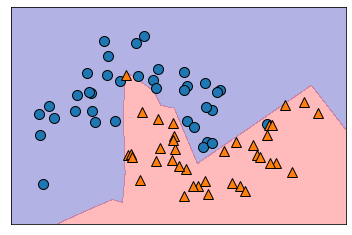

In [9]:

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

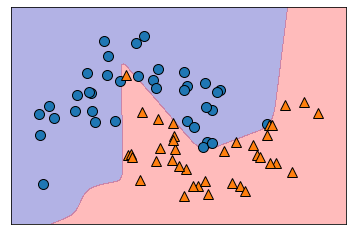

In [10]:

mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


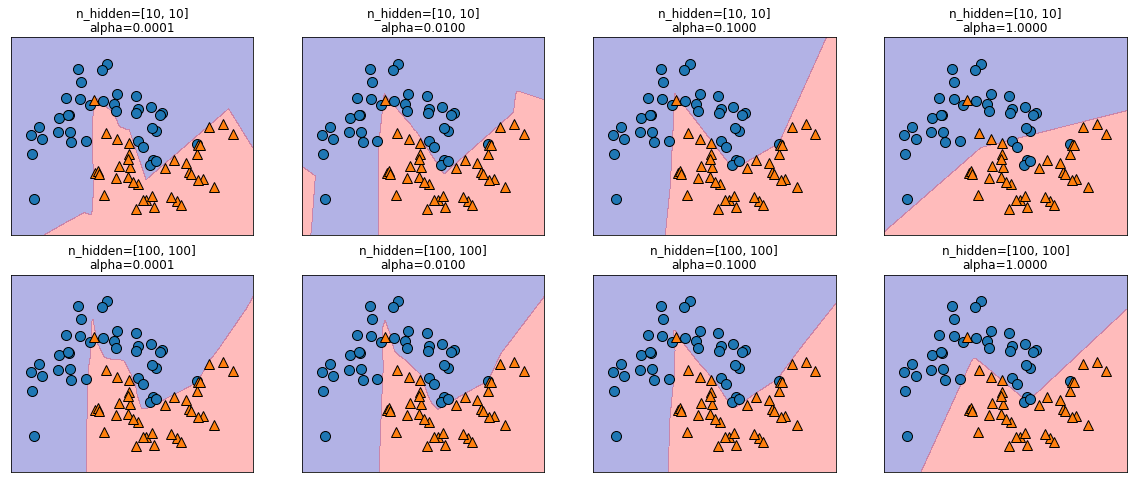

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, .1, 1]):
        mlp = MLPClassifier(solver='lbfgs',
                            alpha=alpha, random_state=0, 
                            hidden_layer_sizes=[n_hidden, n_hidden]).fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(
            n_hidden, n_hidden, alpha))

/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


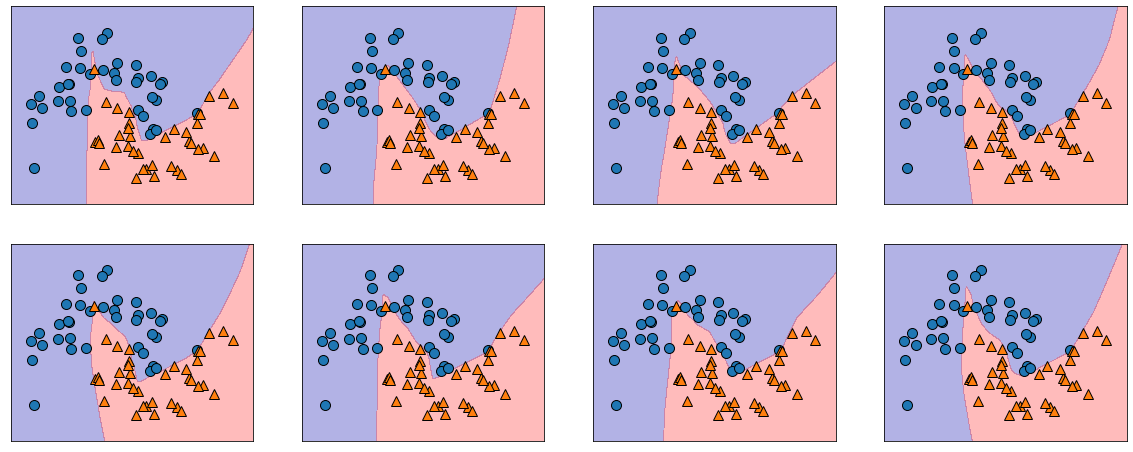

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs',
                        random_state=i, 
                        hidden_layer_sizes=[100, 100]).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.data.max(axis=0))

[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.9389671361502347
0.916083916083916


In [15]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.9906103286384976
0.965034965034965


/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:

mlp = MLPClassifier(random_state=0, max_iter=1000)
mlp.fit(X_train_scaled, y_train)

print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

1.0
0.972027972027972


In [17]:

mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=1)
mlp.fit(X_train_scaled, y_train)

print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.9882629107981221
0.972027972027972


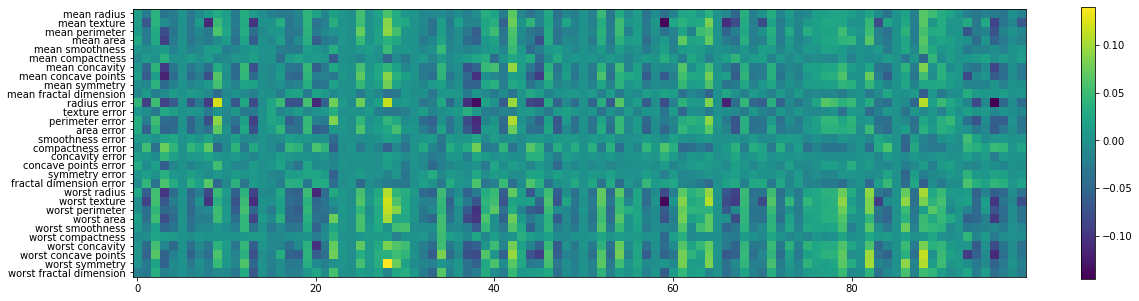

In [18]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.colorbar()